In [37]:
import pickle

from sklearn.metrics import ConfusionMatrixDisplay

from matplotlib import pyplot as plt
from matplotlib import rc

rc("font", **{"family": "Times"})
rc("text", usetex=True)

plt.rcParams['figure.dpi']= 300

labels = [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock"
]

labels_pretty = [label.title() for label in labels]
labels_pretty[4] = 'Hip-Hop'

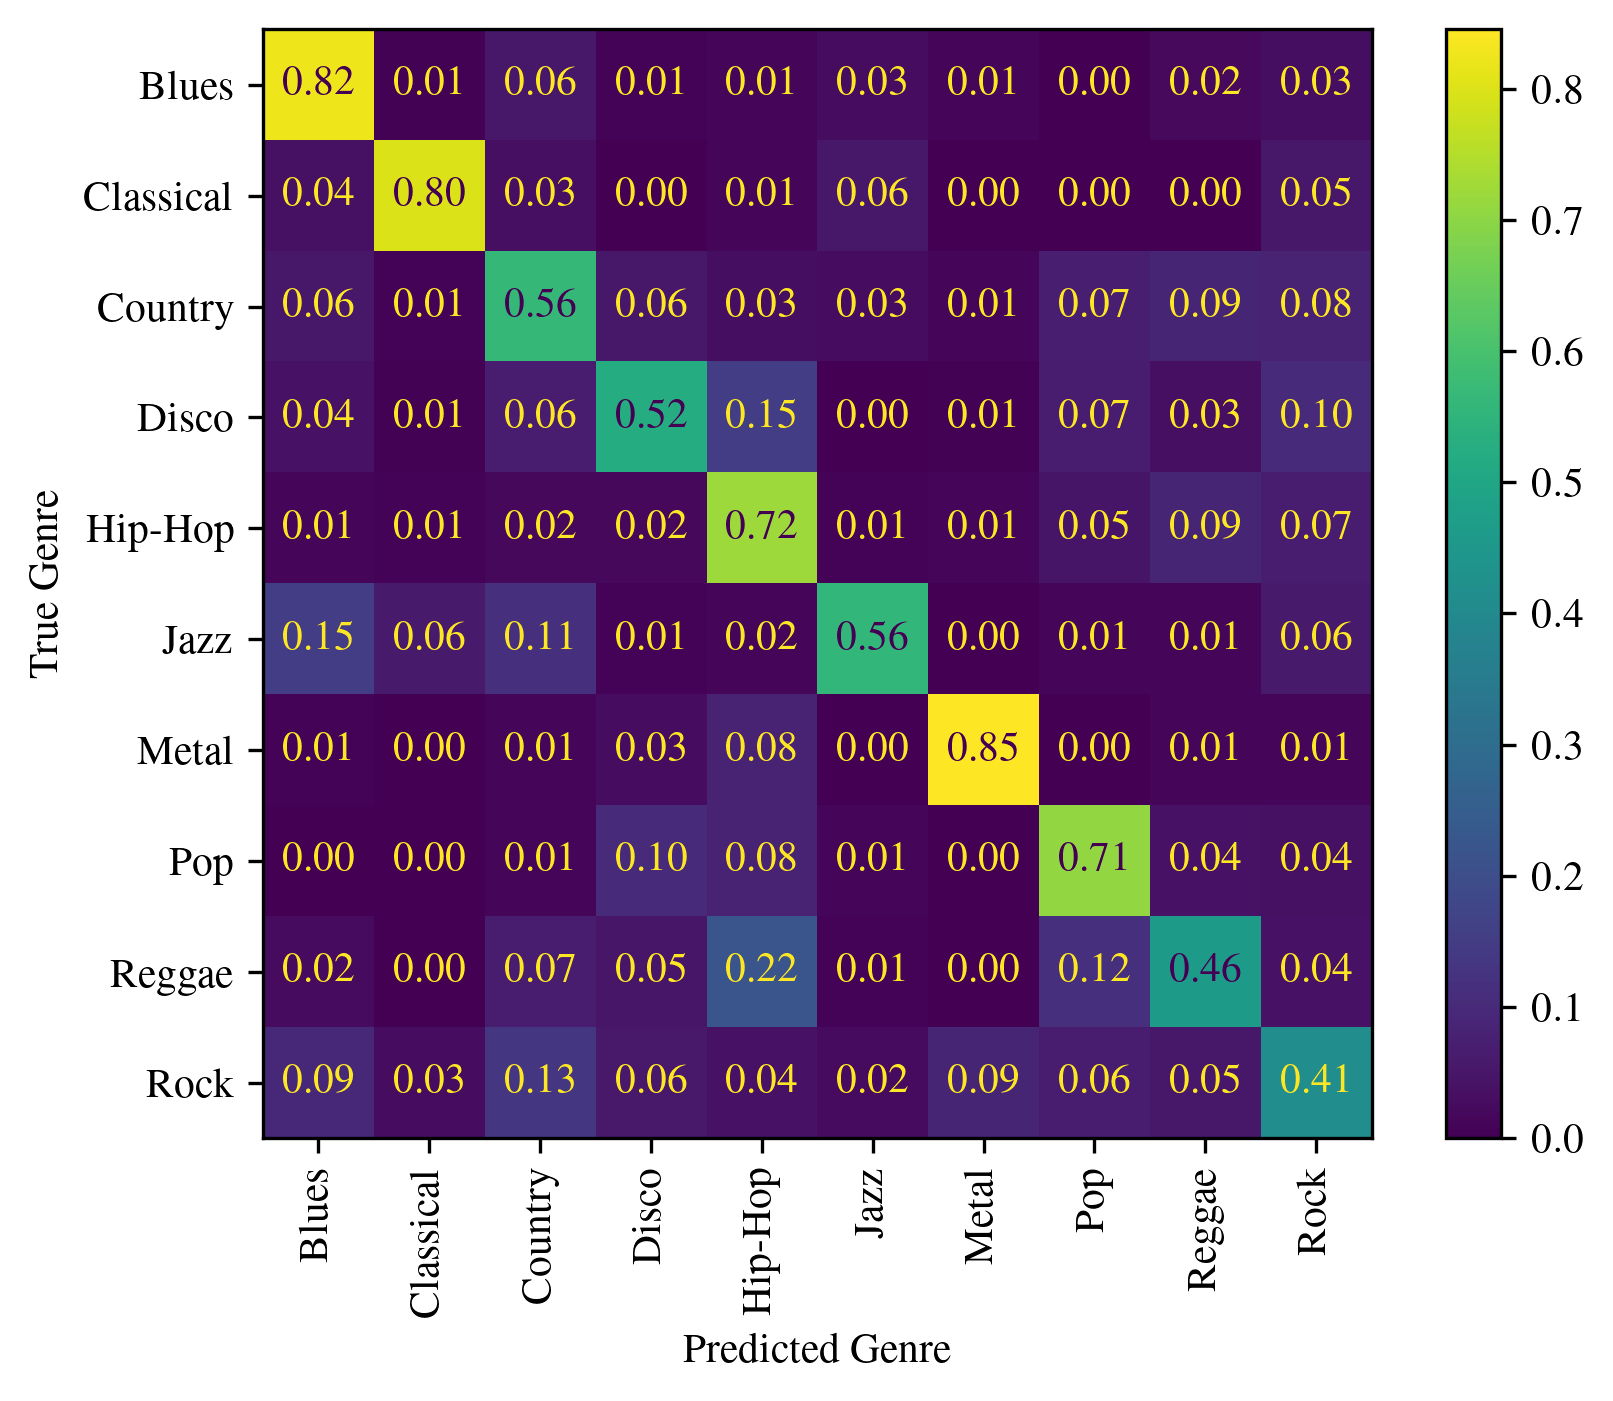

In [38]:
with open("preds_raw.pkl", "rb") as file:
    predictions_for_files = pickle.load(file)

preds = predictions_for_files.values()
preds = [item for items in preds for item in items]
file_names = predictions_for_files.keys()
file_names = [[labels.index(file_name.split('.')[0])] * 15 for file_name in file_names]
actual = [item for items in file_names for item in items]

x = ConfusionMatrixDisplay.from_predictions(
    actual,
    preds,
    display_labels=labels_pretty,
    xticks_rotation="vertical",
    normalize="true",
    values_format=".2f"
)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.savefig("../report/images/cm.png", bbox_inches='tight', pad_inches=0.0)
plt.show()


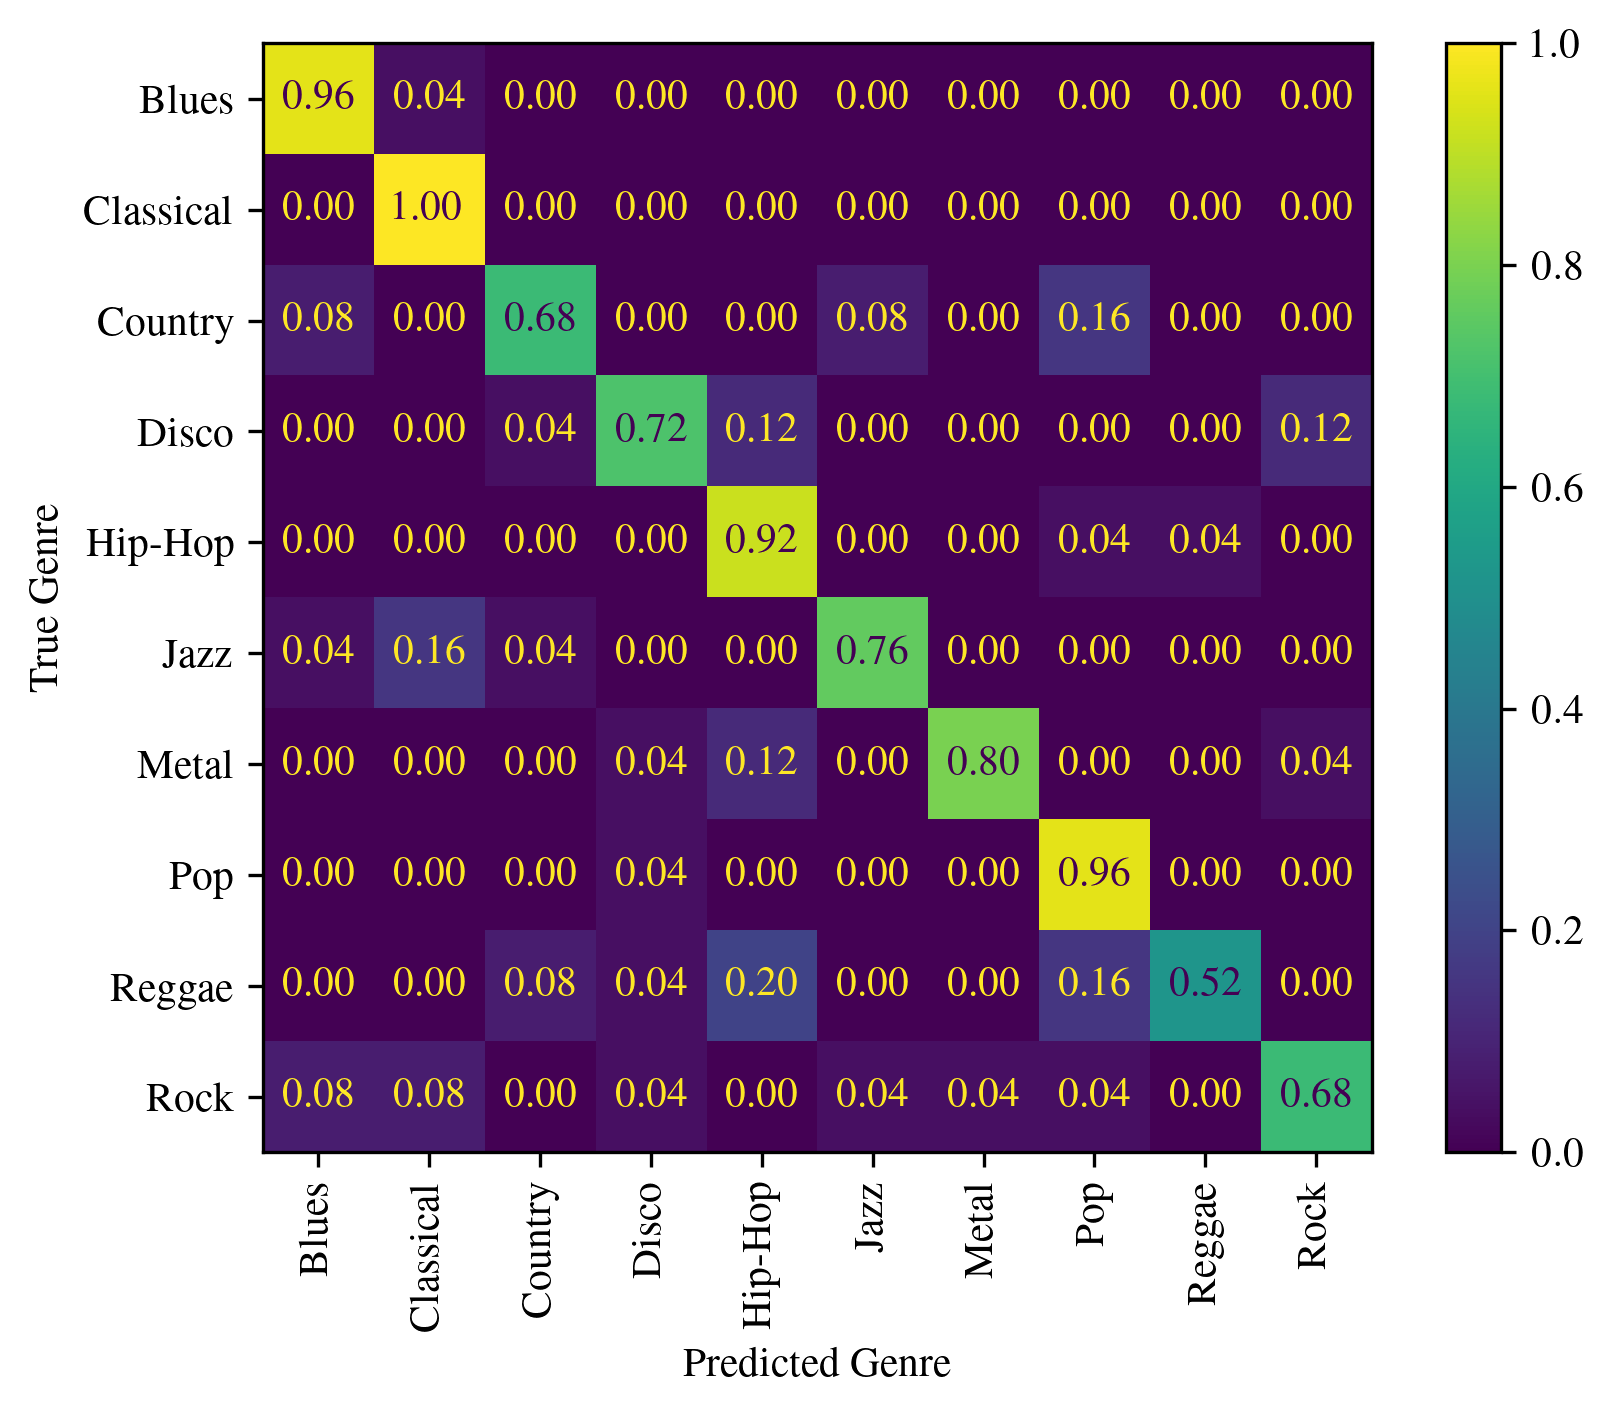

In [39]:
with open("preds_max_prob.pkl", "rb") as file:
    predictions_for_files = pickle.load(file)

preds = list(predictions_for_files.values())
file_names = predictions_for_files.keys()
actual = [labels.index(file_name.split('.')[0])for file_name in file_names]

x = ConfusionMatrixDisplay.from_predictions(
    actual,
    preds,
    display_labels=labels_pretty,
    xticks_rotation="vertical",
    normalize="true",
    values_format=".2f"
)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.savefig("../report/images/cm_improved.png", bbox_inches='tight', pad_inches=0.0)
plt.show()